In [13]:
# Load the data
import torch
import pickle

with open('fk_perf.pkl', 'rb') as f:
    headers, data = pickle.load(f)

import pandas as pd
df = pd.DataFrame(data, columns=headers)

# add a column that is the time divided by the batch size
df['time/batch'] = df['time'] / df['batch_size']

df

,chain,device,dtype,batch_size,time,time/batch
0,val,cpu,torch.float32,1,0.001706,1.705588e-03
1,val,cpu,torch.float32,10,0.001854,1.854159e-04
2,val,cpu,torch.float32,100,0.002467,2.466516e-05
3,val,cpu,torch.float32,1000,0.006334,6.334178e-06
4,val,cpu,torch.float32,10000,0.024186,2.418595e-06
...,...,...,...,...,...,...
67,kuka_iiwa,cuda,torch.float64,10,0.001017,1.016614e-04
68,kuka_iiwa,cuda,torch.float64,100,0.001018,1.017745e-05
69,kuka_iiwa,cuda,torch.float64,1000,0.001307,1.307084e-06
70,kuka_iiwa,cuda,torch.float64,10000,0.005168,5.168081e-07


<Axes: xlabel='batch_size', ylabel='time'>

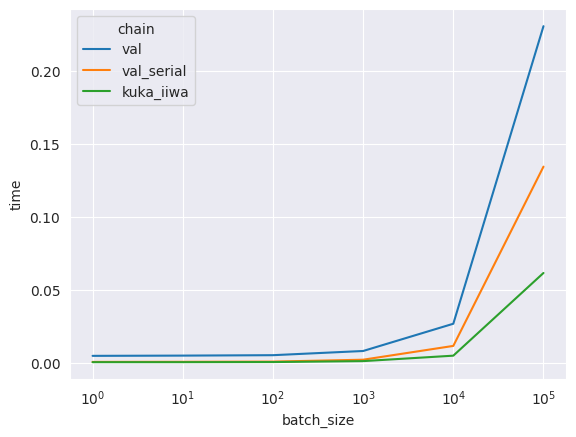

In [14]:
# Plot batch_size on the X axis and time on the Y axis, with a line for each chain, averaged over device and dtype.
import seaborn as sns
import matplotlib.pyplot as plt

# make the X axis log scale
plt.xscale('log')
sns.lineplot(data=df, x='batch_size', y='time', hue='chain', errorbar=None)

<Axes: xlabel='chain', ylabel='time'>

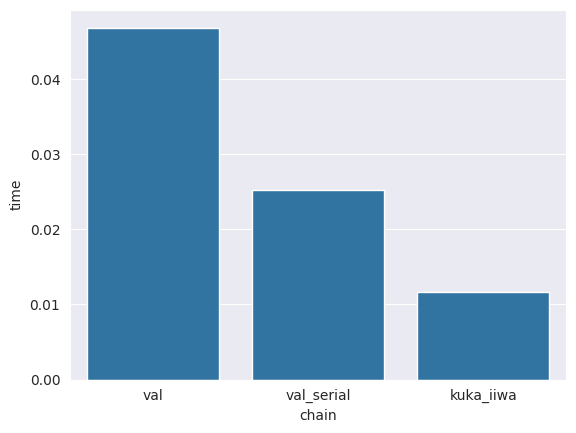

In [15]:
# bar plot of the average time for each chain, averaged over everything else
sns.barplot(data=df, x='chain', y='time', errorbar=None)

<Axes: xlabel='dtype', ylabel='time'>

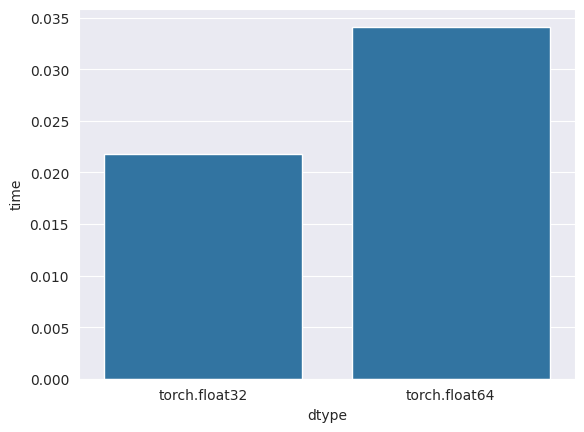

In [16]:
# compare 32 to 64 bit
sns.barplot(data=df, x='dtype', y='time', errorbar=None)